In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
temp_hist = np.load('temperature_history.npy')

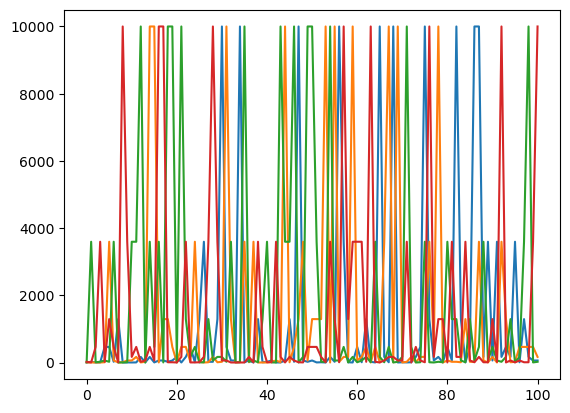

In [20]:
plt.plot(temp_hist[:, 0])
plt.plot(temp_hist[:, 1])
plt.plot(temp_hist[:, 2])
plt.plot(temp_hist[:, 3])
plt.show()

In [21]:
temp_hist = np.load('temp_rank0.npy')

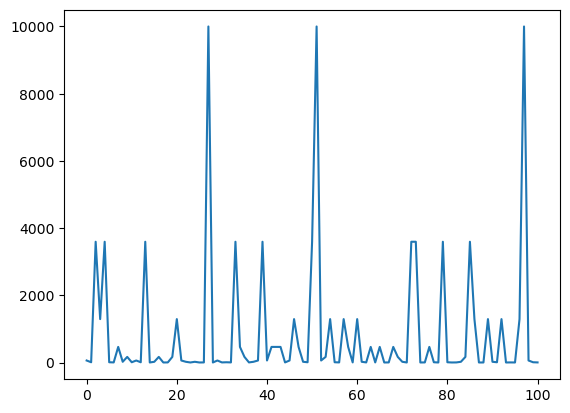

In [22]:
plt.plot(temp_hist[:, 4])
#plt.plot(temp_hist[:, 1])
#plt.plot(temp_hist[:, 2])
#plt.plot(temp_hist[:, 3])
plt.show()

In [33]:
acceptance = np.load('acceptance.npy')

In [34]:
# Compute different order exchange 
order_exchange = []
order_exchange_mean = []
for order in range(10):
    if order == 0:
        order_exchange.append(np.diag(acceptance,order))
    else:
        exchange = np.diag(acceptance,order) / np.diag(acceptance,-order)
        exchange[np.argwhere(np.isnan(exchange))] = 0
        order_exchange.append(exchange)
    order_exchange_mean.append(order_exchange[-1].mean(axis=0))


# Check all elements in the diagonal are 0
assert order_exchange[0].all() == 0

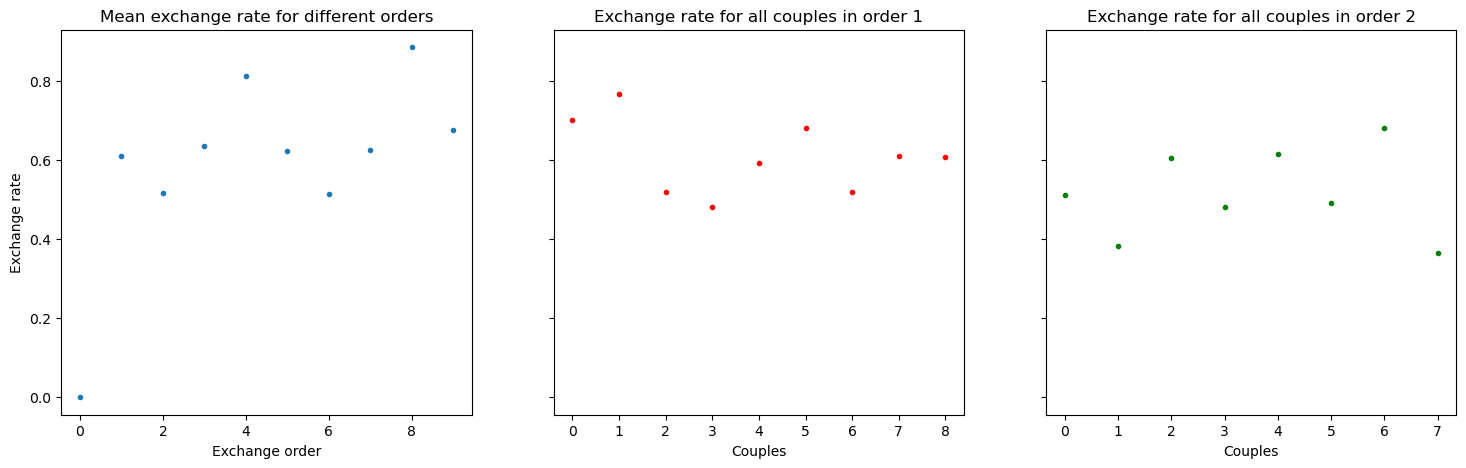

In [35]:
fig, ax = plt.subplots(1,3, figsize=(18,5), sharey=True)

ax[0].plot(order_exchange_mean, '.')
ax[0].set_title('Mean exchange rate for different orders')
ax[0].set_ylabel('Exchange rate')
ax[0].set_xlabel('Exchange order')

ax[1].plot(order_exchange[1], '.', c='r')
ax[1].set_title('Exchange rate for all couples in order 1')
ax[1].set_xlabel('Couples')


ax[2].plot(order_exchange[2], '.', c='g')
ax[2].set_title('Exchange rate for all couples in order 2')
ax[2].set_xlabel('Couples')


plt.show()

In [26]:
acceptance

array([[ 0., 29., 24., 38., 36., 28., 47., 26., 40., 23.],
       [47.,  0., 29., 24., 31., 38., 31., 28., 34., 43.],
       [45., 43.,  0., 26., 27., 34., 49., 30., 42., 35.],
       [55., 55., 52.,  0., 31., 27., 28., 53., 26., 23.],
       [48., 47., 43., 50.,  0., 32., 32., 28., 33., 32.],
       [40., 43., 49., 54., 49.,  0., 34., 24., 30., 51.],
       [78., 50., 64., 50., 52., 47.,  0., 32., 34., 26.],
       [50., 54., 52., 53., 56., 53., 52.,  0., 28., 28.],
       [53., 55., 53., 50., 46., 47., 47., 54.,  0., 25.],
       [40., 45., 50., 56., 53., 59., 47., 63., 51.,  0.]])

[]

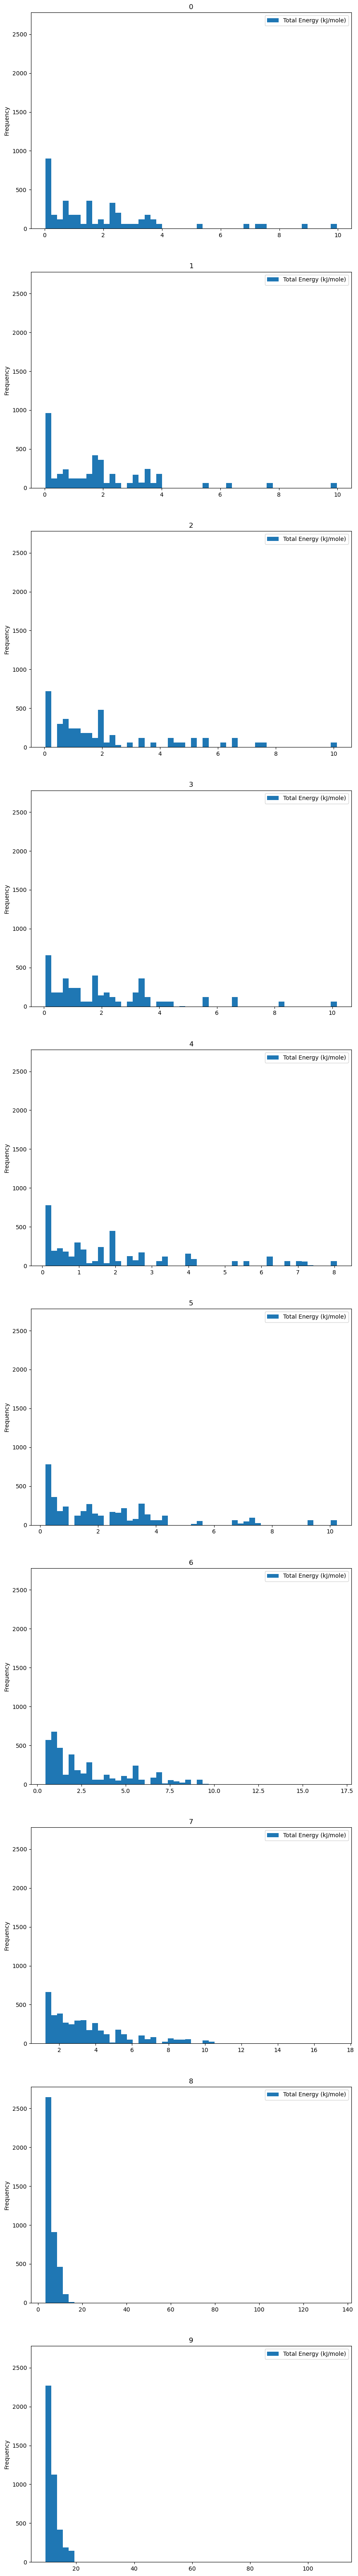

In [31]:
df = pd.read_csv(f'state.csv')
df.plot.hist(column=['Total Energy (kJ/mole)'], by='Number Replica', bins=50, figsize=(10,80), sharey=True)
#df.plot.hist(column=['Potential Energy (kJ/mole)'], by='Number Replica', figsize=(10,80), sharex=True, sharey=True)
plt.plot()

In [32]:
df

,Number Replica,Time (ps),Potential Energy (kJ/mole),Kinetic Energy (kJ/mole),Total Energy (kJ/mole),Box Volume (nm^3),Elapsed Time (s),Speed (ns/day)
0,0,0.003,0.031258,0.000929,0.032187,8.0,0.000205,0.0
1,1,0.003,0.031263,0.002593,0.033856,8.0,0.000502,0.0
2,2,0.003,0.031271,0.007230,0.038502,8.0,0.000771,0.0
3,3,0.003,0.031285,0.020143,0.051428,8.0,0.001054,0.0
4,4,0.003,0.031309,0.056087,0.087396,8.0,0.001347,0.0
...,...,...,...,...,...,...,...,...
41425,3,12.429,4.721554,0.019744,4.741298,8.0,72.782258,14.8
41426,8,12.429,10.664330,3.357407,14.021736,8.0,72.782583,14.8
41427,7,12.429,7.512418,1.205374,8.717792,8.0,72.782912,14.8
41428,9,12.429,4.509044,9.356554,13.865599,8.0,72.783243,14.8
